In [107]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R", local = T)
source("R/Cbind.R", local = T)

In [108]:
data <- data.table::fread(file = "tidy_data_wide.csv")


In [109]:
table(data$Training)


       1X 6X_Massed 6X_Spaced 
      302        19       241 

In [110]:
experiments <- c("24hr LTM", "24hr LTM CHX", "20min STM")
genotypes <- c("Iso31", "orb2")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")

data <- data[
    (experiment %in% c("24hr LTM", "24hr LTM CHX") & Genotype %in% wild_types & Training == "6X_Spaced") |
    (Genotype %in% "orb2"),
]

data <-data[interval=="No_stimulator",]

In [111]:

data <- data[Files %in% unique(grep(x=Files, pattern="SD", invert=TRUE, value = TRUE)),]

# data[Genotype != "orb2", Genotype:="Iso31"]
data[, Group := paste(experiment, ifelse(Genotype=="orb2", "orb2", "Iso31"), sep="-")]

panel3_data<-data

In [112]:
panel3_data_long <- melt(panel3_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [113]:
A <- panel3_data[experiment=="24hr LTM" & Genotype %in% wild_types ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel3_data[experiment=="24hr LTM CHX" & Genotype %in% wild_types,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel3_data[experiment=="24hr LTM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel3_data[experiment=="20min STM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- c("24hr LTM", "24hr LTM CHX", "24hr LTM orb2", "20min STM orb2")

In [114]:
panel3_data[experiment=="24hr LTM", .(.N, mean(POST)), by=.(User, Genotype)]

User,Genotype,N,V2
<chr>,<chr>,<int>,<dbl>
CH,MB010B.(II)SPARC-Chrimson ISO,20,-0.08245000
CH,Iso31,23,-0.04469565
CH,orb2,17,-0.02032353
ET,Iso31,11,-0.15393074
AOJ,Iso31,12,-0.07228836


In [115]:
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "66 51 17 15"


In [116]:
data.table::fwrite(x = A, file="prism/Fig3/Figure_3_24hr LTM.csv")
data.table::fwrite(x = B, file="prism/Fig3/Figure_3_24hr LTM CHX.csv")
data.table::fwrite(x = C, file="prism/Fig3/Figure_3_24hr LTM orb2.csv")
data.table::fwrite(x = D, file="prism/Fig3/Figure_3_20min STM orb2.csv")
data.table::fwrite(x = X, file="prism/Fig3/Figure_3_boxplot.csv")

In [117]:
# sort(table(panel3_data$Files))

In [118]:
panel3_data_long$Group <- factor(panel3_data_long$Group, levels=c("24hr LTM-Iso31", "24hr LTM CHX-Iso31", "24hr LTM-orb2", "20min STM-orb2"))

In [119]:
table(panel3_data_long$Group)/2


    24hr LTM-Iso31 24hr LTM CHX-Iso31      24hr LTM-orb2     20min STM-orb2 
                66                 51                 17                 15 

[1] -1.02  0.70
[1] 0.37


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"

$annotation
              group__ y_position annotations stars  N test          PI
1:     24hr LTM-Iso31        0.5     < 0.001   *** 66  PRE  0.02351986
2:     24hr LTM-Iso31        0.5     < 0.001   *** 66 POST -0.07935907
3: 24hr LTM CHX-Iso31        0.5      0.0892    NS 51  PRE  0.01978431
4: 24hr LTM CHX-Iso31        0.5      0.0892    NS 51 POST -0.02676471
5:      24hr LTM-orb2        0.5      0.2655    NS 17  PRE  0.01426471
6:      24hr LTM-orb2        0.5      0.2655    NS 17 POST -0.02032353
7:     20min STM-orb2        0.5      0.0081    ** 15  PRE  0.01266667
8:     20min STM-orb2        0.5      0.0081    ** 15 POST -0.14546667
     PI_median     PI_std   std_error x
1:  0.00000000 0.07635457 0.009398597 1
2: -0.05552778 0.24009153 0.029553224 2
3:  0.00000000 0.07201515 0.010084139 1
4:  0.00000000 0.23205343 0.032493979 2
5:  0.00000000 0.09142776 0.022174488 1
6:  0.00000000 0.21441832 0.052004082 2
7:  0.00000000 0.1

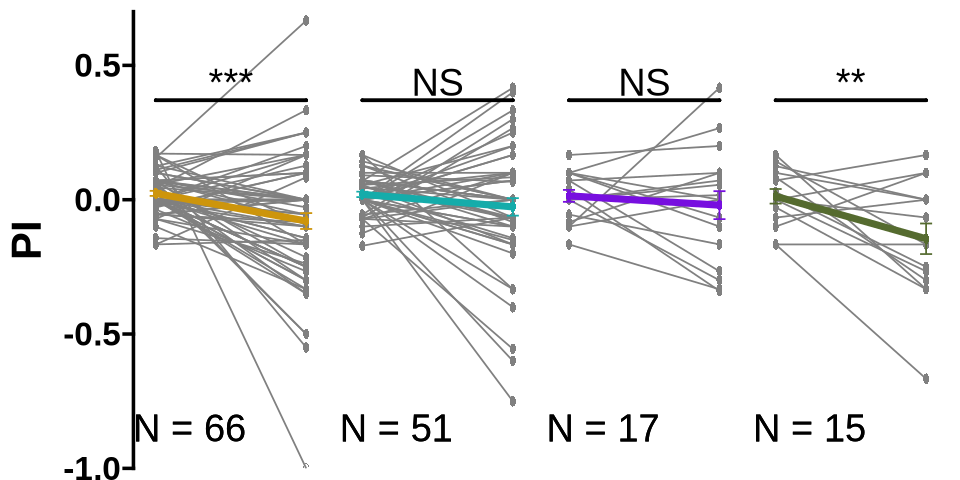

In [120]:
size_unit=2
ratio=2
panel3A <- learning_plot(
    panel3_data_long, "Group", y_limits=c(-1, .7),
    hjust_text = 0.2, textsize = 8, starsize=8,
    y_annotation = 0.37,
    colors=colors_panel3
)
save_learning_plot(plot=panel3A, filename = "prism/Fig3/panel3.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.width=size_unit*panel3A$n_facets, repr.plot.height=size_unit*ratio)
panel3A

Warning message in `[.data.table`(data, , `:=`(outlier, FALSE)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

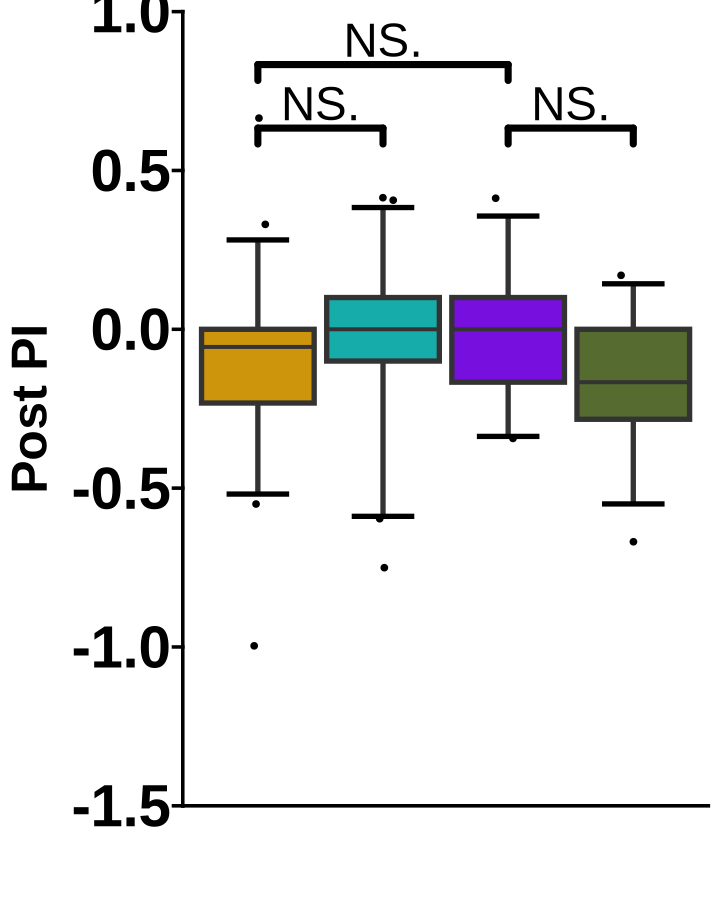

In [123]:
size_unit=1.5
ratio=5

panel3B <- summary_plot(
    panel3_data_long,
    "Group",
    comparisons=list(
        c("24hr LTM-Iso31", "24hr LTM CHX-Iso31"),
        c("24hr LTM-Iso31", "24hr LTM-orb2"),
        c("24hr LTM-orb2", "20min STM-orb2")        
    ),
    annotation_y=c(.55, .75, .55),
    test=unpaired_t_test,
    map_signif_level=TRUE,
    y_limits=c(-1.5, 1),
    text_y_size=35,
    title_y_size=30,
    starsize=10,
    colors=colors_panel3,
    percentile=c(0.025, 0.975)
)
panel3B$gg <- panel3B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank(),
)
#scale_y_continuous(breaks = seq(-1, 0.5, 0.5), limits=c(-1, 0.5))
options(repr.plot.width=size_unit*panel3B$n_facets, repr.plot.height=size_unit*ratio)
panel3B
save_summ_plot(plot=panel3B, filename = "prism/Fig3/panel3B.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.te

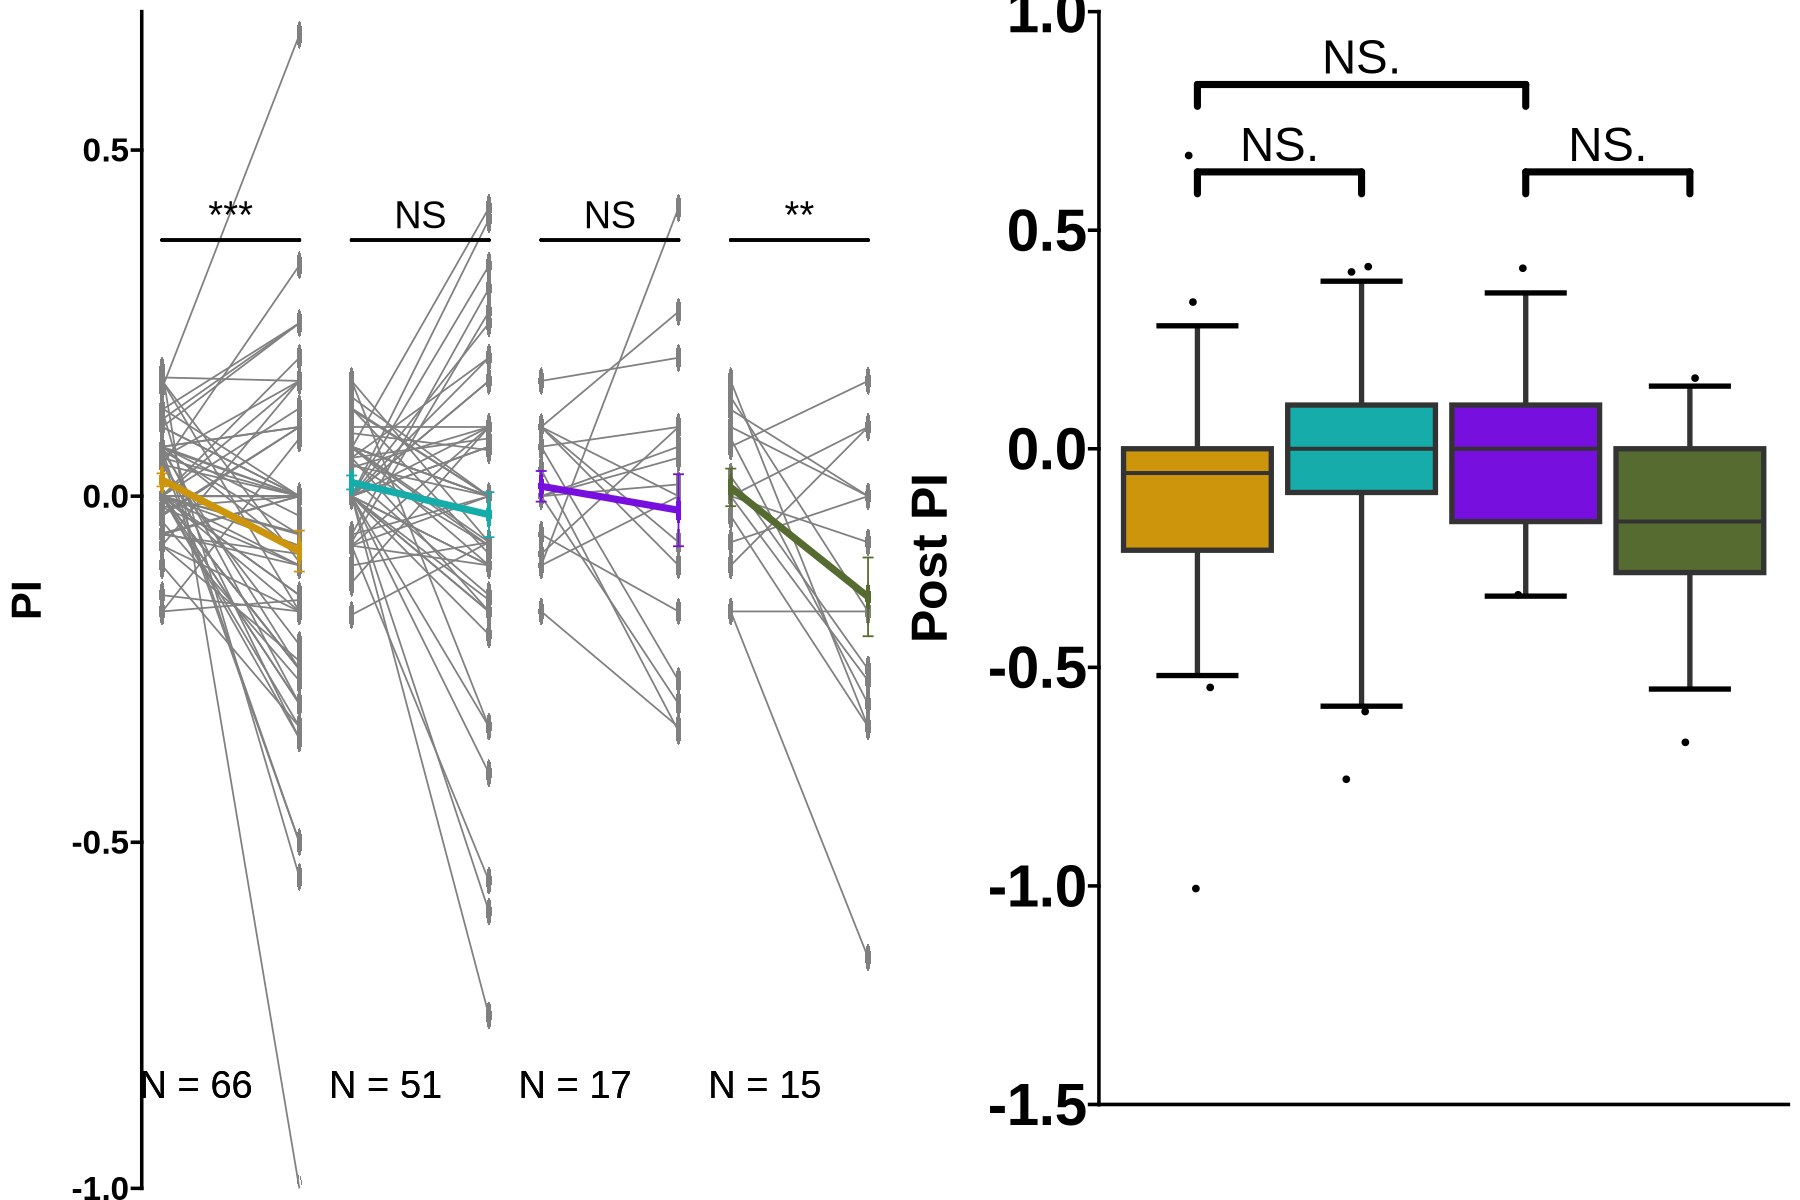

In [125]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel3A$gg, panel3B$gg, ncol=2)
ggsave(plot = gg, filename = "prism/Fig3/Figure_3.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg